Importación de librerías iniciales

In [79]:
# Importaciones de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno   

Importación del dataset

In [2]:
# Importo el df earthquake
df = pd.read_csv('/Users/inesmurcortes/Documents/GitHub/Eathquake/earthquake.csv')

CAP II: Análisis Descriptivo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [73]:
# Análisis de número de valores únicos
df.nunique()

Time               37331
Place              25800
Latitude           31722
Longitude          33478
Depth               4168
Mag                  264
MagType               18
nst                  734
gap                 1160
dmin                3376
rms                  198
net                   16
ID                 37331
Updated            36991
Unnamed: 14            0
Type                   4
horizontalError      453
depthError           756
magError             235
magNst               289
status                 2
locationSource        54
magSource             54
dtype: int64

In [78]:
# Lista de columnas con menos de 20 valores distintos
to_factor = list(df.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
df[to_factor] = df[to_factor].astype('category')

print(f'Columnas transformadas: {to_factor}')


Columnas transformadas: ['MagType', 'net', 'Unnamed: 14', 'Type', 'status']


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Time             37331 non-null  object  
 1   Place            37047 non-null  object  
 2   Latitude         37331 non-null  float64 
 3   Longitude        37331 non-null  float64 
 4   Depth            37197 non-null  float64 
 5   Mag              37331 non-null  float64 
 6   MagType          37331 non-null  category
 7   nst              7473 non-null   float64 
 8   gap              10087 non-null  float64 
 9   dmin             4395 non-null   float64 
 10  rms              20218 non-null  float64 
 11  net              37331 non-null  category
 12  ID               37331 non-null  object  
 13  Updated          37331 non-null  object  
 14  Unnamed: 14      0 non-null      category
 15  Type             37331 non-null  category
 16  horizontalError  3970 non-null   float64

**3. Valores perdidos**

In [32]:
# Creo un DF para analizar el impacto de los missings
ms = df.isna().sum()
ms

Time                   0
Place                284
Latitude               0
Longitude              0
Depth                134
Mag                    0
MagType                0
nst                29858
gap                27244
dmin               32936
rms                17113
net                    0
ID                     0
Updated                0
Unnamed: 14        37331
Type                   0
horizontalError    33361
depthError         16504
magError           20780
magNst             31959
status                 0
locationSource         0
magSource              0
dtype: int64

In [52]:
# Aíslo aquellas columnas afectadas por valores nulos, de forma que podamos entender mejor su incidencia.
ms_graf = ms[ms>0]

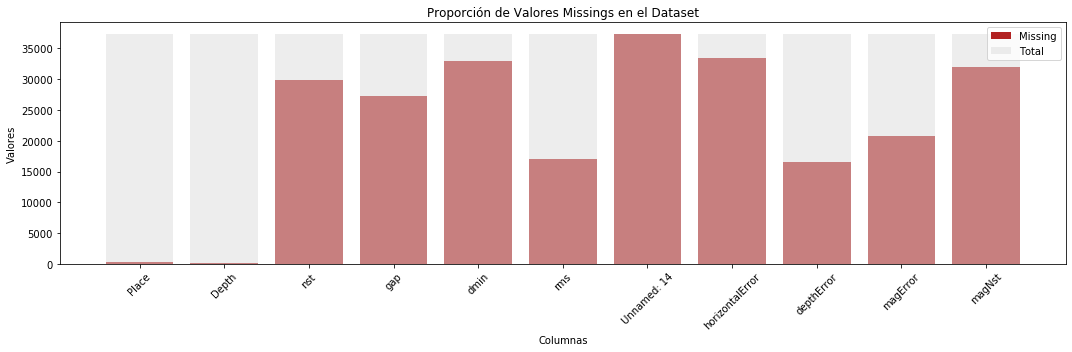

In [68]:
# Plot de datos missing

plt.figure(figsize=(15, 5))  # Set the figure size

# Barra valores missings
plt.bar(ms_graf.index, ms_graf.values, color='firebrick', label='Missing')

# Barrra valores totales
total_rows = len(df)
plt.bar(ms_graf.index, [total_rows] * len(missing), color='gainsboro', alpha=0.5, label='Total')

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Proporción de Valores Missings en el Dataset')
plt.legend()
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

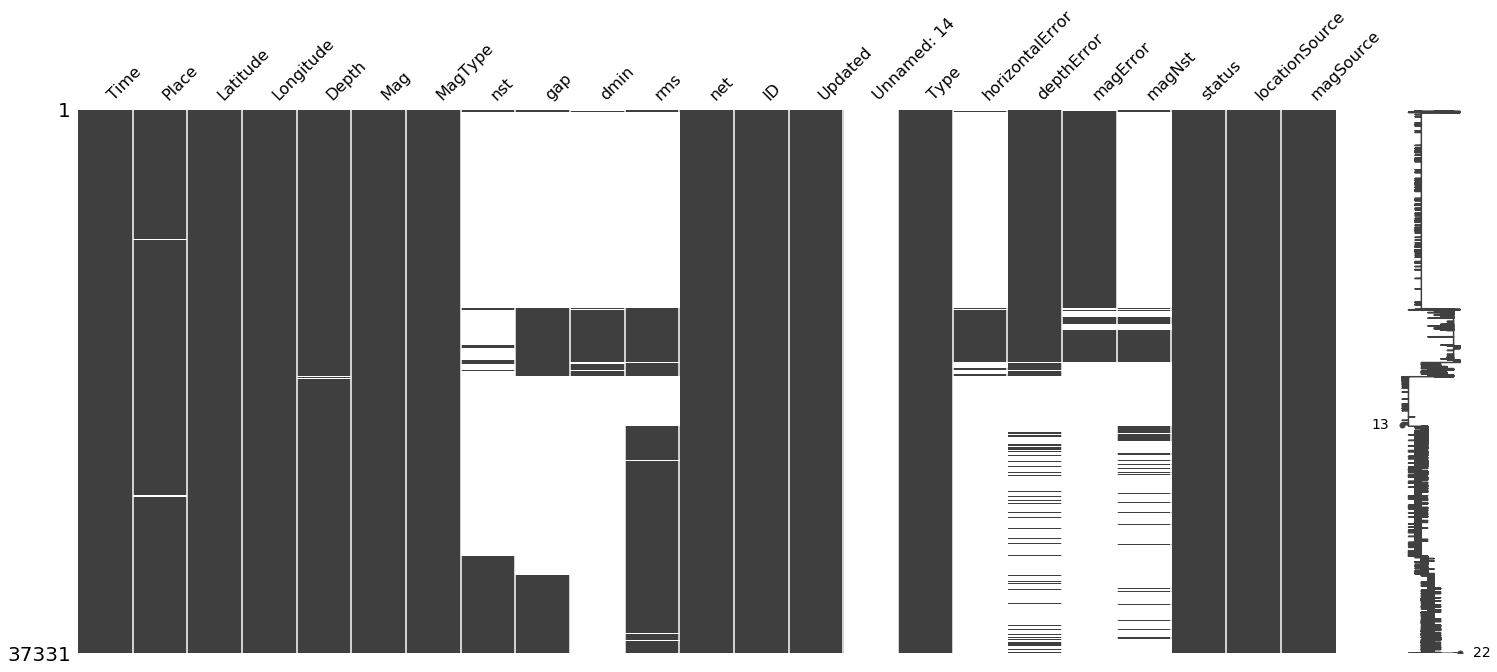

In [81]:
# Gráfico de patrones de correlación de missings, ordenados por ID
msno.matrix(df.sort_values(by='ID'))

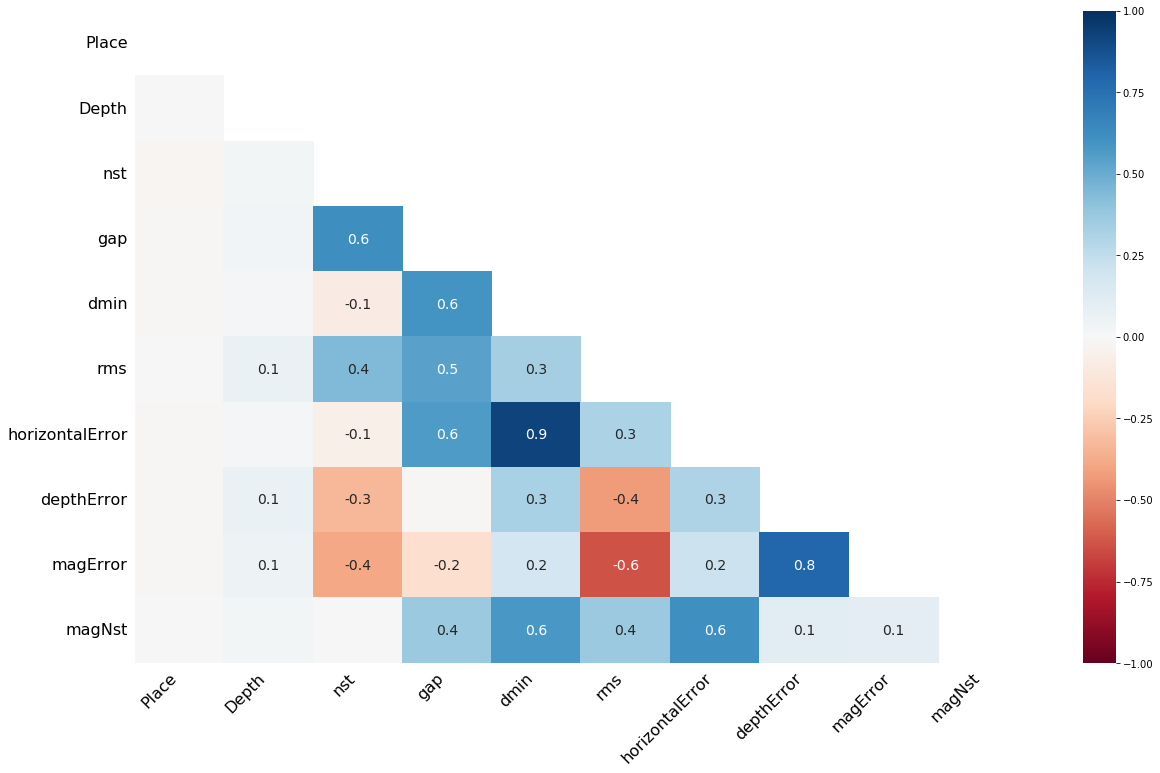

In [83]:
# Gráfico heatmap para comprobar niveles de correlación de missings entre variables
msno.heatmap(df)


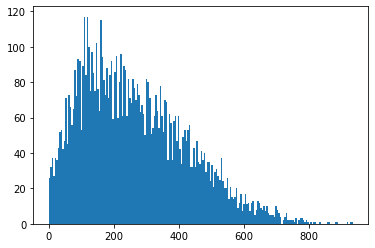

In [58]:
import matplotlib.pyplot as plt
plt.hist(df.nst, bins=200)
plt.show()

In [43]:
df.Type.unique()

array(['earthquake', 'volcanic eruption', 'nuclear explosion',
       'explosion'], dtype=object)

In [ ]:
#df.drop(columns=['Unnamed: 14', 'magNst', 'magError', 'dmin', 'horizontalError'])

In [44]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        #fig = sns.countplot(x=col)
        return(fig)

In [50]:
import plotly.express as px
fig = px.bar(df.Type.value_counts())
fig.show()

In [56]:
(df.Type == 'nuclear explosion').sum()

243